Importing Libraries.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing The Dataset.

In [125]:
Data = pd.read_csv(r"C:\Users\Mady Ibrahim\Desktop\Mobile Dataset Analysis\Mobiles Dataset (2025).csv",encoding = "latin1")

Cleaning & Transformation & EDA.

In [126]:
Data.head(3)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024


In [127]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [128]:
Duplicate_Indices = Data.index[Data.duplicated(keep = "first")]
Duplicate_Indices.to_list()

[347, 437, 438, 441, 442, 443, 445, 446, 447, 448, 449, 450, 451, 452, 798]

In [129]:
Data.duplicated().sum()

np.int64(15)

In [130]:
Data = Data.drop_duplicates()
Data.reset_index(drop = True,inplace = True)

In [131]:
Data.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [132]:
Data.rename(columns = {
                    "Company Name" : "Company_Name",
                    "Model Name" : "Model_Name",
                    "Mobile Weight": "Mobile_Weight_Grams",
                    "RAM" : "RAM_GB",
                    "Battery Capacity" : "Battery_Capacity_mAh",
                    "Screen Size" : "Screen_Size_Inches",
                    "Front Camera" : "Front_Camera",
                    "Back Camera" : "Back_Camera",
                    "Launched Price (Pakistan)" : "Launched_Price_PKR",
                    "Launched Price (India)" : "Launched_Price_INR",
                    "Launched Price (China)" : "Launched_Price_CNY",
                    "Launched Price (USA)" : "Launched_Price_USD",
                    "Launched Price (Dubai)" : "Launched_Price_AED",
                    "Launched Year" : "Launched_Year",
                    },inplace = True)

In [133]:
Data.head(3)

,Company_Name,Model_Name,Mobile_Weight_Grams,RAM_GB,Front_Camera,Back_Camera,Processor,Battery_Capacity_mAh,Screen_Size_Inches,Launched_Price_PKR,Launched_Price_INR,Launched_Price_CNY,Launched_Price_USD,Launched_Price_AED,Launched_Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024


In [134]:
import re
for index, value in Data["Mobile_Weight_Grams"].items():
    if re.findall("g", value):
        Data.at[index, "Mobile_Weight_Grams"] = value.replace("g", "")
def Editing(CN,Value_To_Find):
    for index, value in Data[CN].items():
        if re.findall(Value_To_Find, value):
            Data.at[index, CN] = value.replace(Value_To_Find, "")
Editing("RAM_GB","GB")
Editing("Battery_Capacity_mAh","mAh")
Editing("Screen_Size_Inches","inches")
Editing("Launched_Price_PKR","PKR")
Editing("Launched_Price_INR","INR")
Editing("Launched_Price_CNY","CNY")
Editing("Launched_Price_CNY","¥")
Editing("Launched_Price_USD","USD")
Editing("Launched_Price_AED","AED")

In [135]:
Data.head(3)

,Company_Name,Model_Name,Mobile_Weight_Grams,RAM_GB,Front_Camera,Back_Camera,Processor,Battery_Capacity_mAh,Screen_Size_Inches,Launched_Price_PKR,Launched_Price_INR,Launched_Price_CNY,Launched_Price_USD,Launched_Price_AED,Launched_Year
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,"3,600",6.1,"224,999","79,999","5,799",799,"2,799",2024
1,Apple,iPhone 16 256GB,174,6,12MP,48MP,A17 Bionic,"3,600",6.1,"234,999","84,999","6,099",849,"2,999",2024
2,Apple,iPhone 16 512GB,174,6,12MP,48MP,A17 Bionic,"3,600",6.1,"244,999","89,999","6,499",899,"3,199",2024


In [136]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company_Name          915 non-null    object
 1   Model_Name            915 non-null    object
 2   Mobile_Weight_Grams   915 non-null    object
 3   RAM_GB                915 non-null    object
 4   Front_Camera          915 non-null    object
 5   Back_Camera           915 non-null    object
 6   Processor             915 non-null    object
 7   Battery_Capacity_mAh  915 non-null    object
 8   Screen_Size_Inches    915 non-null    object
 9   Launched_Price_PKR    915 non-null    object
 10  Launched_Price_INR    915 non-null    object
 11  Launched_Price_CNY    915 non-null    object
 12  Launched_Price_USD    915 non-null    object
 13  Launched_Price_AED    915 non-null    object
 14  Launched_Year         915 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 10

In [137]:
Data["Battery_Capacity_mAh"] = Data["Battery_Capacity_mAh"].str.replace("[^\d.]", "", regex = True)
Data["RAM_GB"] = Data["RAM_GB"].str.replace("[^\d.]", "", regex = True)
Data["Mobile_Weight_Grams"] = Data["Mobile_Weight_Grams"].str.replace("[^\d.]", "", regex = True)
Data["Launched_Price_PKR"] = Data["Launched_Price_PKR"].str.replace("[^\d.]", "", regex = True)
Data["Launched_Price_INR"] = Data["Launched_Price_INR"].str.replace("[^\d.]", "", regex = True)
Data["Launched_Price_CNY"] = Data["Launched_Price_CNY"].str.replace("[^\d.]", "", regex = True)
Data["Launched_Price_USD"] = Data["Launched_Price_USD"].str.replace("[^\d.]", "", regex = True)
Data["Launched_Price_AED"] = Data["Launched_Price_AED"].str.replace("[^\d.]", "", regex = True)
Data.isnull().sum()

Company_Name            0
Model_Name              0
Mobile_Weight_Grams     0
RAM_GB                  0
Front_Camera            0
Back_Camera             0
Processor               0
Battery_Capacity_mAh    0
Screen_Size_Inches      0
Launched_Price_PKR      0
Launched_Price_INR      0
Launched_Price_CNY      0
Launched_Price_USD      0
Launched_Price_AED      0
Launched_Year           0
dtype: int64

In [138]:
Data["Launched_Price_PKR"] = pd.to_numeric(Data["Launched_Price_PKR"], errors = "coerce").astype("float", errors = "ignore")
Data["Launched_Price_INR"] = pd.to_numeric(Data["Launched_Price_INR"], errors = "coerce").astype("float", errors = "ignore")
Data["Launched_Price_CNY"] = pd.to_numeric(Data["Launched_Price_CNY"], errors = "coerce").astype("float", errors = "ignore")
Data["Launched_Price_USD"] = pd.to_numeric(Data["Launched_Price_USD"], errors = "coerce").astype("float", errors = "ignore")
Data["Launched_Price_AED"] = pd.to_numeric(Data["Launched_Price_AED"], errors = "coerce").astype("float", errors = "ignore")
Data["Battery_Capacity_mAh"] = pd.to_numeric(Data["Battery_Capacity_mAh"], errors = "coerce").astype("int", errors = "ignore")
Data["Mobile_Weight_Grams"] = pd.to_numeric(Data["Mobile_Weight_Grams"], errors = "coerce").astype("int", errors = "ignore")
Data["RAM_GB"] = pd.to_numeric(Data["RAM_GB"], errors = "coerce").astype("int", errors = "ignore")
Data.isnull().sum()

Company_Name            0
Model_Name              0
Mobile_Weight_Grams     0
RAM_GB                  0
Front_Camera            0
Back_Camera             0
Processor               0
Battery_Capacity_mAh    0
Screen_Size_Inches      0
Launched_Price_PKR      1
Launched_Price_INR      0
Launched_Price_CNY      0
Launched_Price_USD      0
Launched_Price_AED      0
Launched_Year           0
dtype: int64

In [139]:
Data[Data.isnull().any(axis = 1)]

,Company_Name,Model_Name,Mobile_Weight_Grams,RAM_GB,Front_Camera,Back_Camera,Processor,Battery_Capacity_mAh,Screen_Size_Inches,Launched_Price_PKR,Launched_Price_INR,Launched_Price_CNY,Launched_Price_USD,Launched_Price_AED,Launched_Year
914,Samsung,Galaxy Z Fold6 1TB,239,12,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.6,NaN,200999.0,17999.0,2259.0,8699.0,2024


In [140]:
pd.options.display.max_rows = 600
Data = Data.sort_values(by = "Company_Name")
Data = Data.reset_index(drop = True)

In [141]:
Data[Data.isnull().any(axis = 1)]
Data["Launched_Price_PKR"] = Data["Launched_Price_PKR"].fillna(650000)

In [142]:
Data["Launched_Price_in_Pakistan_USD"] = Data["Launched_Price_PKR"] * 0.0036
Data["Launched_Price_in_India_USD"] = Data["Launched_Price_INR"] * 0.012
Data["Launched_Price_in_China_USD"] = Data["Launched_Price_CNY"] * 0.15
Data["Launched_Price_in_Dubai_USD"] = Data["Launched_Price_AED"] * 0.27

In [143]:
Data.drop(columns = ["Launched_Price_PKR","Launched_Price_INR","Launched_Price_CNY","Launched_Price_AED"]
        ,axis = 1
        ,inplace = True)

In [144]:
Data["Launched_Price_in_USA_USD"] = Data["Launched_Price_USD"]

In [145]:
Data.drop(columns = ["Launched_Price_USD"],axis = 1,inplace = True)

In [146]:
Data.head(3)

,Company_Name,Model_Name,Mobile_Weight_Grams,RAM_GB,Front_Camera,Back_Camera,Processor,Battery_Capacity_mAh,Screen_Size_Inches,Launched_Year,Launched_Price_in_Pakistan_USD,Launched_Price_in_India_USD,Launched_Price_in_China_USD,Launched_Price_in_Dubai_USD,Launched_Price_in_USA_USD
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,2024,809.9964,959.988,869.85,755.73,799.0
1,Apple,iPhone X 256GB,174,3,7MP,12MP + 12MP,A11 Bionic,2716,5.8,2017,665.9964,1198.800,1318.20,1133.73,1099.0
2,Apple,iPhone X 64GB,174,3,7MP,12MP + 12MP,A11 Bionic,2716,5.8,2017,593.9964,1078.800,1258.20,1025.73,999.0


In [147]:
Last = Data.pop("Launched_Year")
Data["Launched_Year"] = Last

In [148]:
Data.head(3)

,Company_Name,Model_Name,Mobile_Weight_Grams,RAM_GB,Front_Camera,Back_Camera,Processor,Battery_Capacity_mAh,Screen_Size_Inches,Launched_Price_in_Pakistan_USD,Launched_Price_in_India_USD,Launched_Price_in_China_USD,Launched_Price_in_Dubai_USD,Launched_Price_in_USA_USD,Launched_Year
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,809.9964,959.988,869.85,755.73,799.0,2024
1,Apple,iPhone X 256GB,174,3,7MP,12MP + 12MP,A11 Bionic,2716,5.8,665.9964,1198.800,1318.20,1133.73,1099.0,2017
2,Apple,iPhone X 64GB,174,3,7MP,12MP + 12MP,A11 Bionic,2716,5.8,593.9964,1078.800,1258.20,1025.73,999.0,2017


In [149]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company_Name                    915 non-null    object 
 1   Model_Name                      915 non-null    object 
 2   Mobile_Weight_Grams             915 non-null    int64  
 3   RAM_GB                          915 non-null    int64  
 4   Front_Camera                    915 non-null    object 
 5   Back_Camera                     915 non-null    object 
 6   Processor                       915 non-null    object 
 7   Battery_Capacity_mAh            915 non-null    int64  
 8   Screen_Size_Inches              915 non-null    object 
 9   Launched_Price_in_Pakistan_USD  915 non-null    float64
 10  Launched_Price_in_India_USD     915 non-null    float64
 11  Launched_Price_in_China_USD     915 non-null    float64
 12  Launched_Price_in_Dubai_USD     915 

In [150]:
Data["Launched_Price_in_Pakistan_USD"] = Data["Launched_Price_in_Pakistan_USD"].astype(int)
Data["Launched_Price_in_India_USD"] = Data["Launched_Price_in_India_USD"].astype(int)
Data["Launched_Price_in_China_USD"] = Data["Launched_Price_in_China_USD"].astype(int)
Data["Launched_Price_in_Dubai_USD"] = Data["Launched_Price_in_Dubai_USD"].astype(int)
Data["Launched_Price_in_USA_USD"] = Data["Launched_Price_in_USA_USD"].astype(int)

In [151]:
Data["Company_Name"] = Data["Company_Name"].replace({"Poco" : "POCO"})

In [152]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Company_Name                    915 non-null    object
 1   Model_Name                      915 non-null    object
 2   Mobile_Weight_Grams             915 non-null    int64 
 3   RAM_GB                          915 non-null    int64 
 4   Front_Camera                    915 non-null    object
 5   Back_Camera                     915 non-null    object
 6   Processor                       915 non-null    object
 7   Battery_Capacity_mAh            915 non-null    int64 
 8   Screen_Size_Inches              915 non-null    object
 9   Launched_Price_in_Pakistan_USD  915 non-null    int64 
 10  Launched_Price_in_India_USD     915 non-null    int64 
 11  Launched_Price_in_China_USD     915 non-null    int64 
 12  Launched_Price_in_Dubai_USD     915 non-null    in

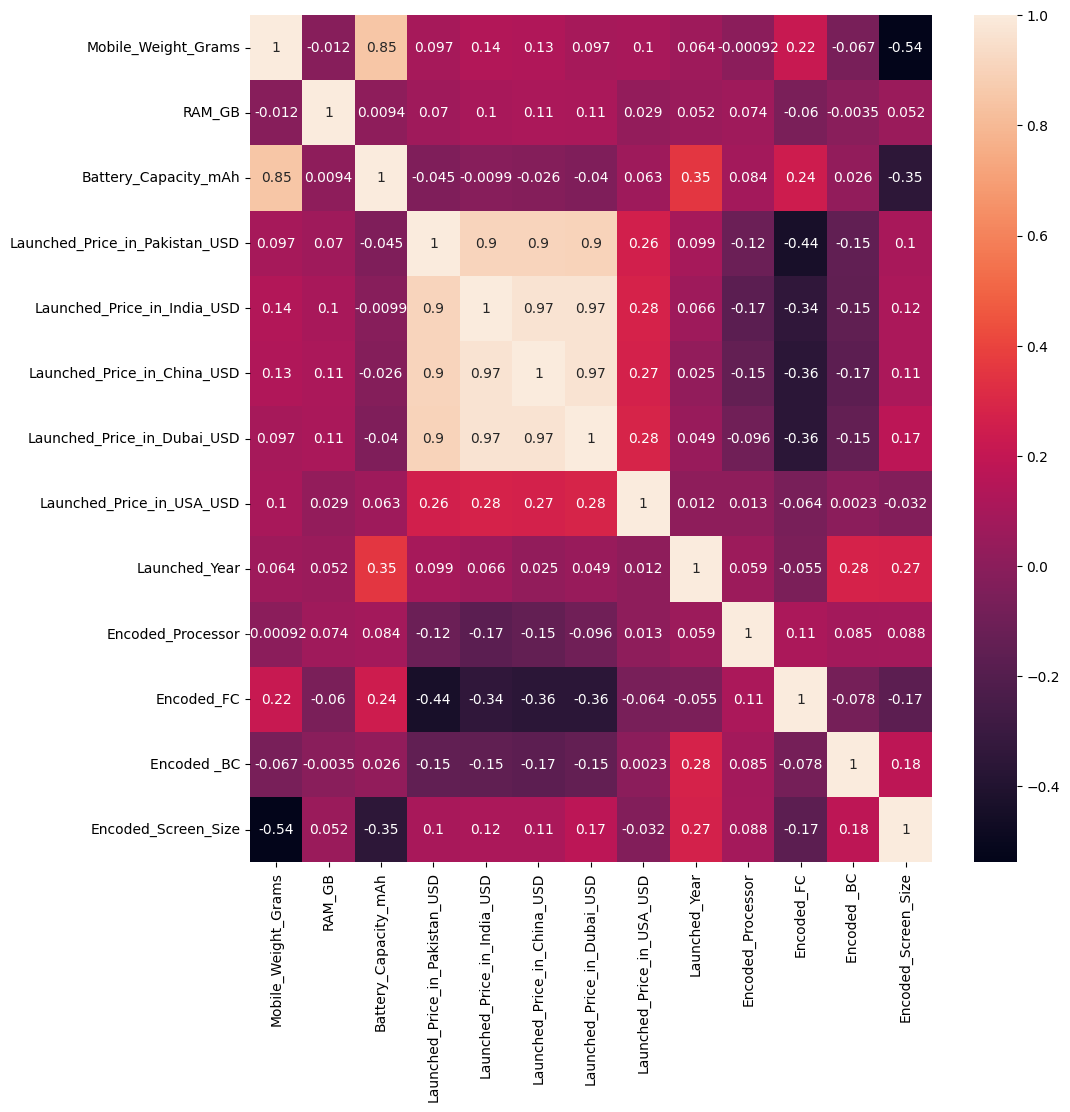

In [153]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Data["Encoded_Processor"] = Encoder.fit_transform(Data["Processor"])
Data["Encoded_FC"] = Encoder.fit_transform(Data["Front_Camera"])
Data["Encoded _BC"] = Encoder.fit_transform(Data["Back_Camera"])
Data["Encoded_Screen_Size"] = Encoder.fit_transform(Data["Screen_Size_Inches"])
plt.figure(figsize = (11,11))
sns.heatmap(Data.select_dtypes(exclude = np.object_).corr(),annot = True)
plt.show()

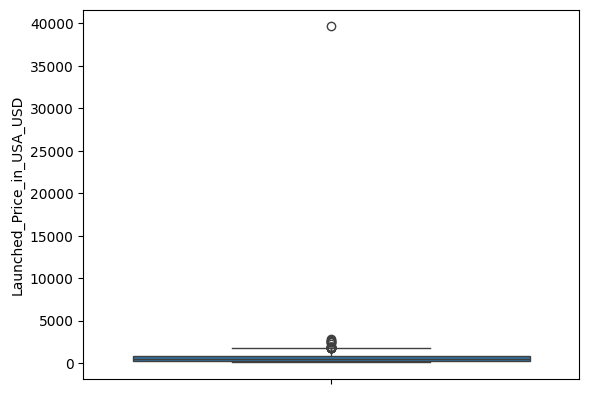

In [154]:
sns.boxplot(Data["Launched_Price_in_USA_USD"])
plt.show()

In [155]:
Data.loc[Data["Launched_Price_in_USA_USD"] > 36000,["Company_Name","Model_Name","Launched_Price_in_USA_USD"]].head(30)

,Company_Name,Model_Name,Launched_Price_in_USA_USD
391,Nokia,T21,39622


In [156]:
Data.loc[391,"Launched_Price_in_USA_USD"] = 240 # Real Price.

In [157]:
Data.loc[391]

Company_Name                            Nokia
Model_Name                                T21
Mobile_Weight_Grams                       466
RAM_GB                                      4
Front_Camera                              8MP
Back_Camera                               8MP
Processor                         Unisoc T612
Battery_Capacity_mAh                     8200
Screen_Size_Inches                      10.4 
Launched_Price_in_Pakistan_USD            187
Launched_Price_in_India_USD               215
Launched_Price_in_China_USD               187
Launched_Price_in_Dubai_USD               234
Launched_Price_in_USA_USD                 240
Launched_Year                            2022
Encoded_Processor                         212
Encoded_FC                                 26
Encoded _BC                                89
Encoded_Screen_Size                         2
Name: 391, dtype: object

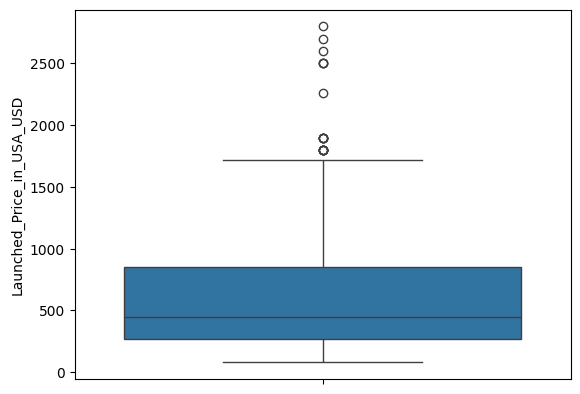

In [158]:
sns.boxplot(Data["Launched_Price_in_USA_USD"])
plt.show()

In [159]:
Data.describe()

,Mobile_Weight_Grams,RAM_GB,Battery_Capacity_mAh,Launched_Price_in_Pakistan_USD,Launched_Price_in_India_USD,Launched_Price_in_China_USD,Launched_Price_in_Dubai_USD,Launched_Price_in_USA_USD,Launched_Year,Encoded_Processor,Encoded_FC,Encoded _BC,Encoded_Screen_Size
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,228.910383,9.545355,5030.280874,456.807650,611.884153,577.333333,593.293989,588.655738,2022.205464,105.925683,15.003279,44.784699,53.853552
std,106.164722,37.713809,1365.571834,372.395678,493.266138,416.386242,424.642692,422.260980,1.869182,67.672326,7.167349,27.541268,20.268341
min,135.000000,1.000000,2000.000000,57.000000,71.000000,74.000000,80.000000,79.000000,2014.000000,0.000000,0.000000,0.000000,0.000000
25%,185.000000,6.000000,4400.000000,197.000000,239.000000,269.000000,270.000000,269.000000,2021.000000,47.000000,10.000000,15.500000,46.000000
50%,195.000000,8.000000,5000.000000,323.000000,431.000000,435.000000,458.000000,449.000000,2023.000000,98.000000,16.000000,46.000000,60.000000
75%,209.000000,8.000000,5100.000000,647.000000,899.000000,824.000000,863.000000,849.000000,2024.000000,175.000000,21.000000,71.000000,64.500000
max,732.000000,812.000000,11200.000000,2340.000000,3299.000000,2699.000000,2996.000000,2799.000000,2025.000000,216.000000,28.000000,90.000000,96.000000


Exportation.

In [ ]:
# New_Data = Data.to_csv(r"C:\Users\Mady Ibrahim\Desktop\Mobile Dataset Analysis\Cleaned Mobiles Dataset (2025).csv",index = False)
# x = Data[Data["Launched_Year"] == 2024]
# c = Data[["Company_Name","Launched_Price_in_Pakistan_USD","Launched_Year"]]
# z = c[c["Launched_Year"] == 2024].groupby("Company_Name")["Launched_Price_in_Pakistan_USD"].mean().sort_values().head(17)
# z
# Data[(Data["Launched_Year"] == 2025) & (Data["Company_Name"] == "Oppo")].count()